In [66]:

from collections import Counter
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.stats import normaltest



In [131]:

df = pd.read_csv('../dataset/movies_with_bafta.csv')

# Categorical columns
categorical_columns = [
    'genre', 'country', 'language', 
     'production_company',
]

# Numerical columns
numerical_columns = [
     'duration', 'avg_vote', 'votes', 'revenue_with_CPI', 
    'converted_budget', 
    'dir_oscar_nomination', 'dir_oscar_won', 'writer_oscar_nomination', 'writer_oscar_won', 
    'cast_oscar_nomination', 'cast_oscar_won', 'dir_globe_nomination', 'dir_globe_won', 'cast_globe_nomination', 
   'cast_globe_won',
    #'actors_films_before', 'director_films_before', 'writers_films_before', 
    'BAFTA_act_nom','BAFTA_act_won','BAFTA_dir_nom','BAFTA_dir_won','BAFTA_writer_nom','BAFTA_writer_won',
    'dir_emmy_nom','dir_emmy_won','writer_emmy_won','writer_emmy_nom','act_emmy_nom','act_emmy_won'
]


categorical_df = df[categorical_columns]
numerical_df = df[numerical_columns]

df=df[numerical_columns+categorical_columns]
print("Categorical DataFrame:")
print(categorical_df.head())

print("\nNumerical DataFrame:")
print(numerical_df.head())


Categorical DataFrame:
                 genre country language  \
0         Crime, Drama     USA  English   
1                Drama     USA  English   
2  Drama, History, War     USA  English   
3                Drama     USA  English   
4     Adventure, Crime  France   French   

                                 production_company  
0  Independent Moving Pictures Co. of America (IMP)  
1               Jesse L. Lasky Feature Play Company  
2                                  Kay-Bee Pictures  
3                            Fine Arts Film Company  
4             Société des Etablissements L. Gaumont  

Numerical DataFrame:
   duration  avg_vote  votes  revenue_with_CPI  converted_budget  \
0      88.0       6.1  527.0        55484317.0          175700.3   
1      59.0       6.4  859.0       331523495.5         3013850.0   
2      77.0       6.1  218.0         4139975.0          521727.6   
3      50.0       4.6  554.0       223938744.3         5598468.6   
4     300.0       7.4  814.0    

In [114]:
# Missing Values Analysis
print("\nMissing Values Analysis:")
print(numerical_df.isnull().sum())
print(categorical_df.isnull().sum())


Missing Values Analysis:
duration                     0
avg_vote                     0
votes                        0
revenue_with_CPI             0
converted_budget           119
dir_oscar_nomination         0
dir_oscar_won                0
writer_oscar_nomination      0
writer_oscar_won             0
cast_oscar_nomination        0
cast_oscar_won               0
dir_globe_nomination         0
dir_globe_won                0
cast_globe_nomination        0
cast_globe_won               0
BAFTA_act_nom                0
BAFTA_act_won                0
BAFTA_dir_nom                0
BAFTA_dir_won                0
BAFTA_writer_nom             0
BAFTA_writer_won             0
dir_emmy_nom                 0
dir_emmy_won                 0
writer_emmy_won              0
writer_emmy_nom              0
act_emmy_nom                 0
act_emmy_won                 0
dtype: int64
genre                   0
country                 5
language              106
production_company    629
dtype: int64


In [115]:

df.dropna(subset=['converted_budget'], inplace=True)


# Numerical Features

In [92]:

# Basic Descriptive Statistics for Numerical Columns
print("Descriptive Statistics for Numerical Columns:")
print(numerical_df.describe())


Descriptive Statistics for Numerical Columns:
       duration_df1      avg_vote         votes  revenue_with_CPI  \
count  20778.000000  20778.000000  2.077800e+04      2.077800e+04   
mean     103.951872     60.132159  3.157736e+05      1.002295e+08   
std       21.507513     11.927524  9.906257e+05      2.866202e+08   
min       41.000000     10.000000  1.000000e+03      1.200000e+00   
25%       90.000000     54.000000  3.790000e+03      1.072334e+06   
50%      100.000000     62.000000  1.819000e+04      1.387147e+07   
75%      112.000000     68.000000  1.586750e+05      8.165596e+07   
max      808.000000     94.000000  2.159628e+07      8.813185e+09   

       converted_budget  dir_oscar_nomination  dir_oscar_won  \
count      2.065900e+04          20778.000000   20778.000000   
mean       3.573183e+07              0.115218       0.025941   
std        6.672804e+07              0.597848       0.189616   
min        0.000000e+00              0.000000       0.000000   
25%        3

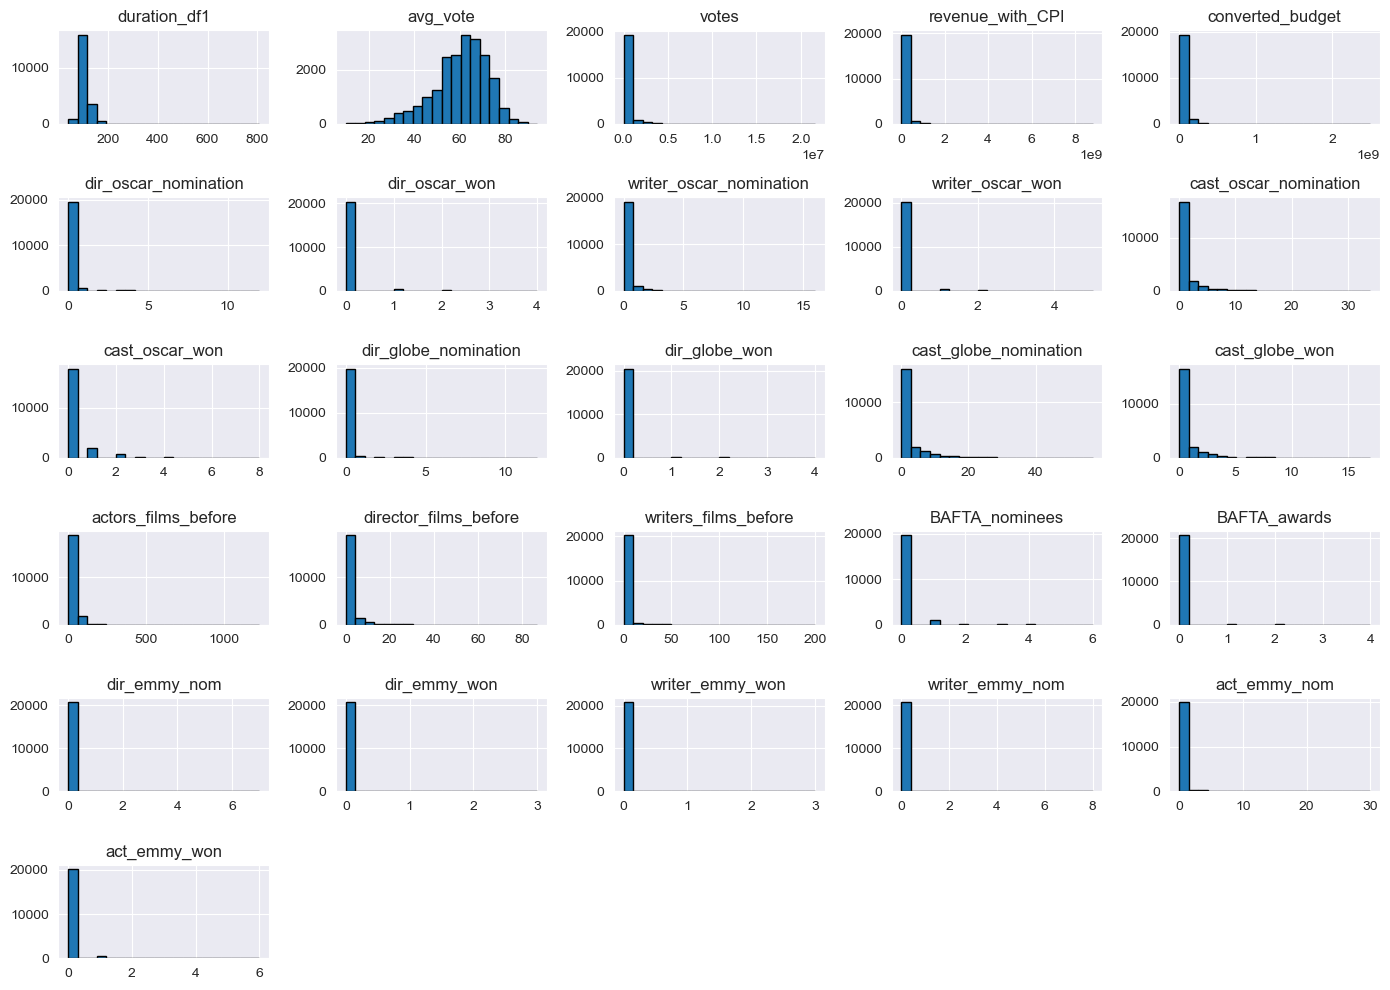

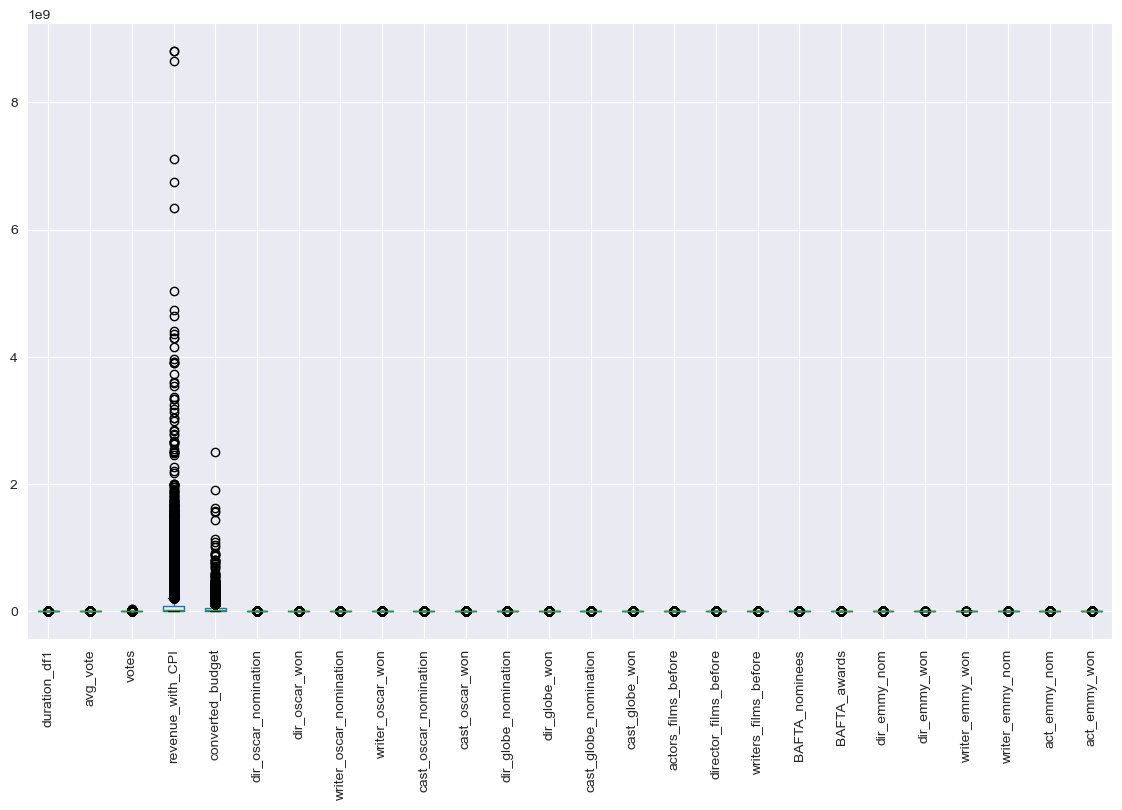

In [93]:
# Histograms for Numerical Columns
numerical_df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Boxplots for Numerical Columns
plt.figure(figsize=(14, 8))
numerical_df.boxplot()
plt.xticks(rotation=90)
plt.show()



<Figure size 1400x1000 with 0 Axes>

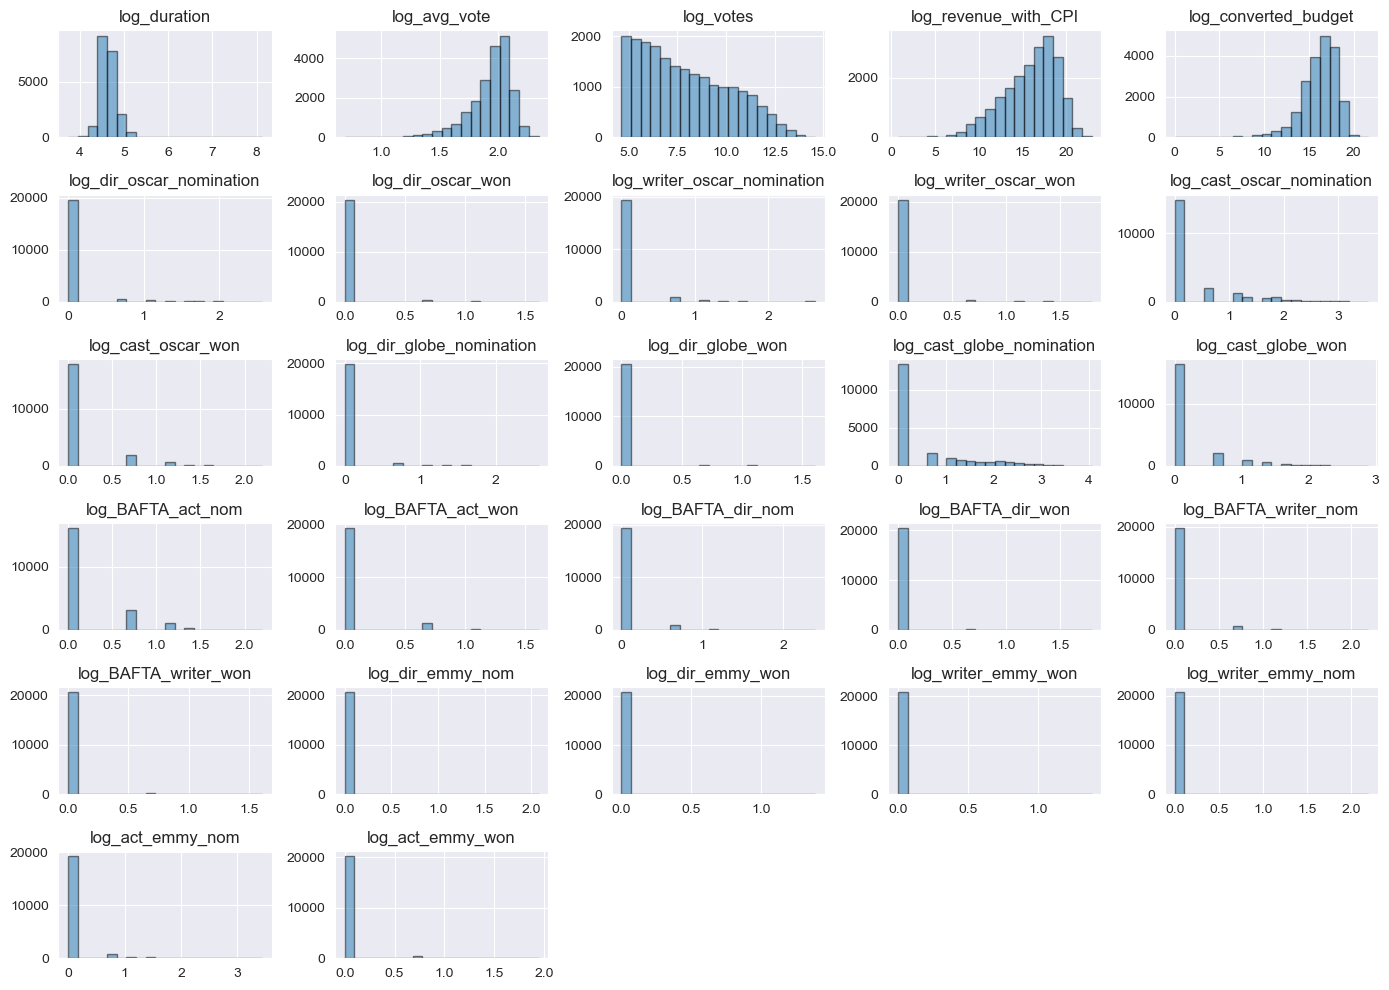

<Figure size 1400x1000 with 0 Axes>

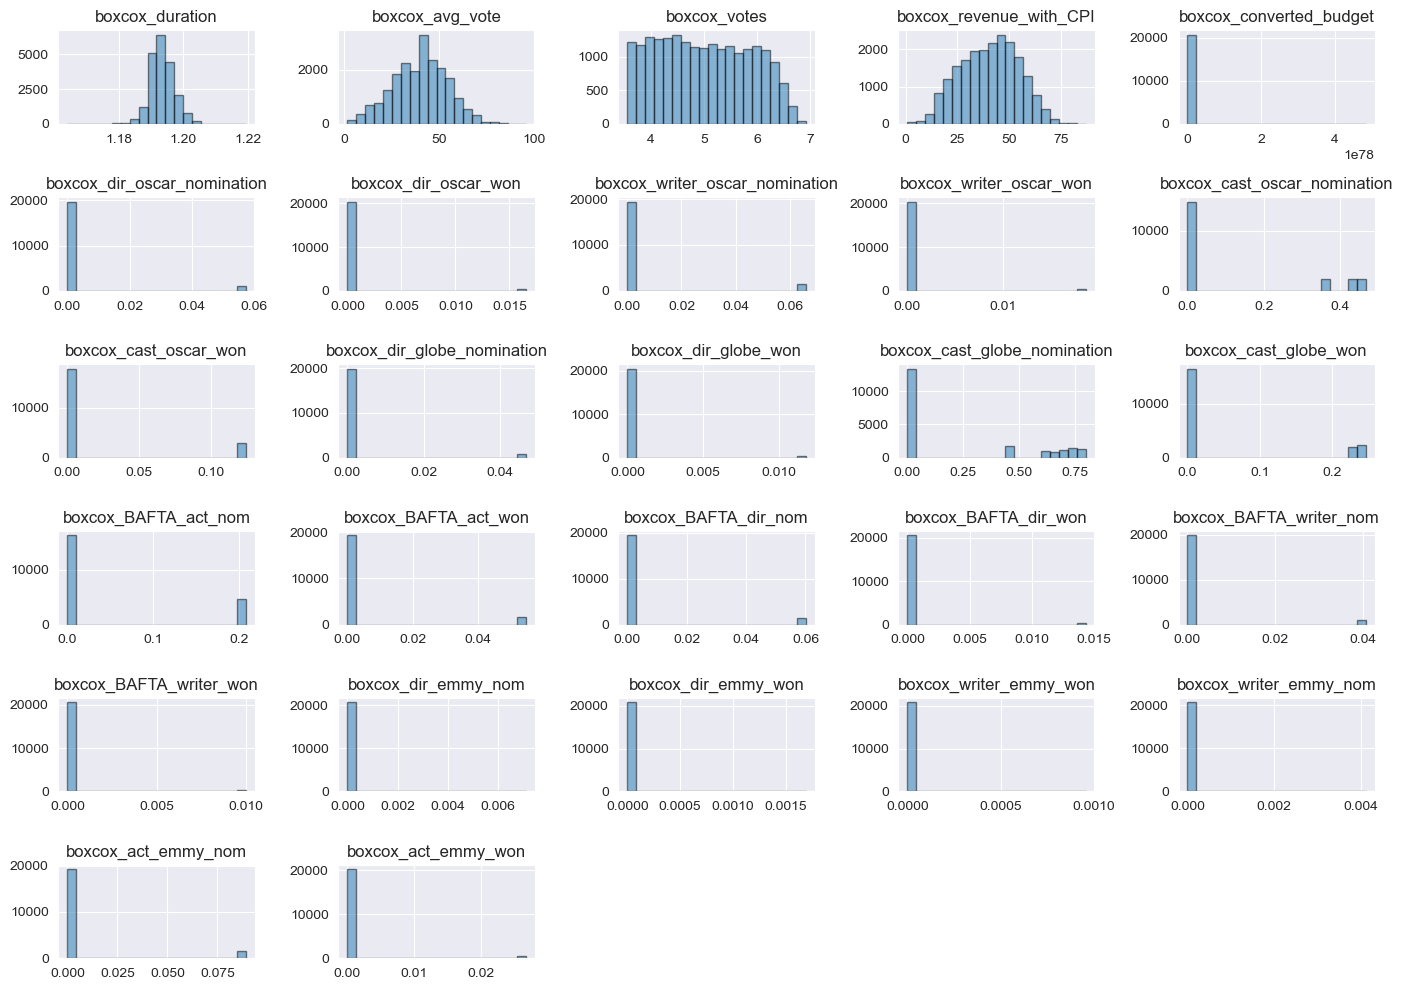

In [132]:

# log transformation to the skewed numerical columns
for col in numerical_columns:
    df[f'log_{col}'] = np.log1p(df[col])  # Adding 1 to avoid log(0)

# Visualize the transformed data (log transformation)
log_transformed_columns = [f'log_{col}' for col in numerical_columns]

# Box-Cox transformation to the skewed numerical columns
for col in numerical_columns:
    if df[col].min() >= 0: 
        transformed_data, _ = boxcox(df[col]+1)
        df[f'boxcox_{col}'] = transformed_data

# Visualize the Box-Cox transformed data
boxcox_transformed_columns = [f'boxcox_{col}' for col in numerical_columns]

# Plot histograms for Log Transformed Numerical Columns
plt.figure(figsize=(14, 10))
df[log_transformed_columns].hist(figsize=(14, 10), bins=20, edgecolor='black', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot histograms for Box-Cox Transformed Numerical Columns
plt.figure(figsize=(14, 10))
df[boxcox_transformed_columns].hist(figsize=(14, 10), bins=20, edgecolor='black', alpha=0.5)
plt.tight_layout()
plt.show()



In [106]:
# Normality tests for transformed data
print("Normality tests for transformed data:")
for col in log_transformed_columns + boxcox_transformed_columns:
    stat, p = normaltest(df[col].dropna())
    print(f'{col}:')
    print(f'   Normality test statistic: {stat}')
    print(f'   p-value: {p}')
    if p < 0.05:
        print("   Data does not appear to be normally distributed.")
    else:
        print("   Data appears to be normally distributed.")


Normality tests for transformed data:


KeyError: 'log_duration_df1'

C:\Users\BOLO\miniconda3\envs\Business\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


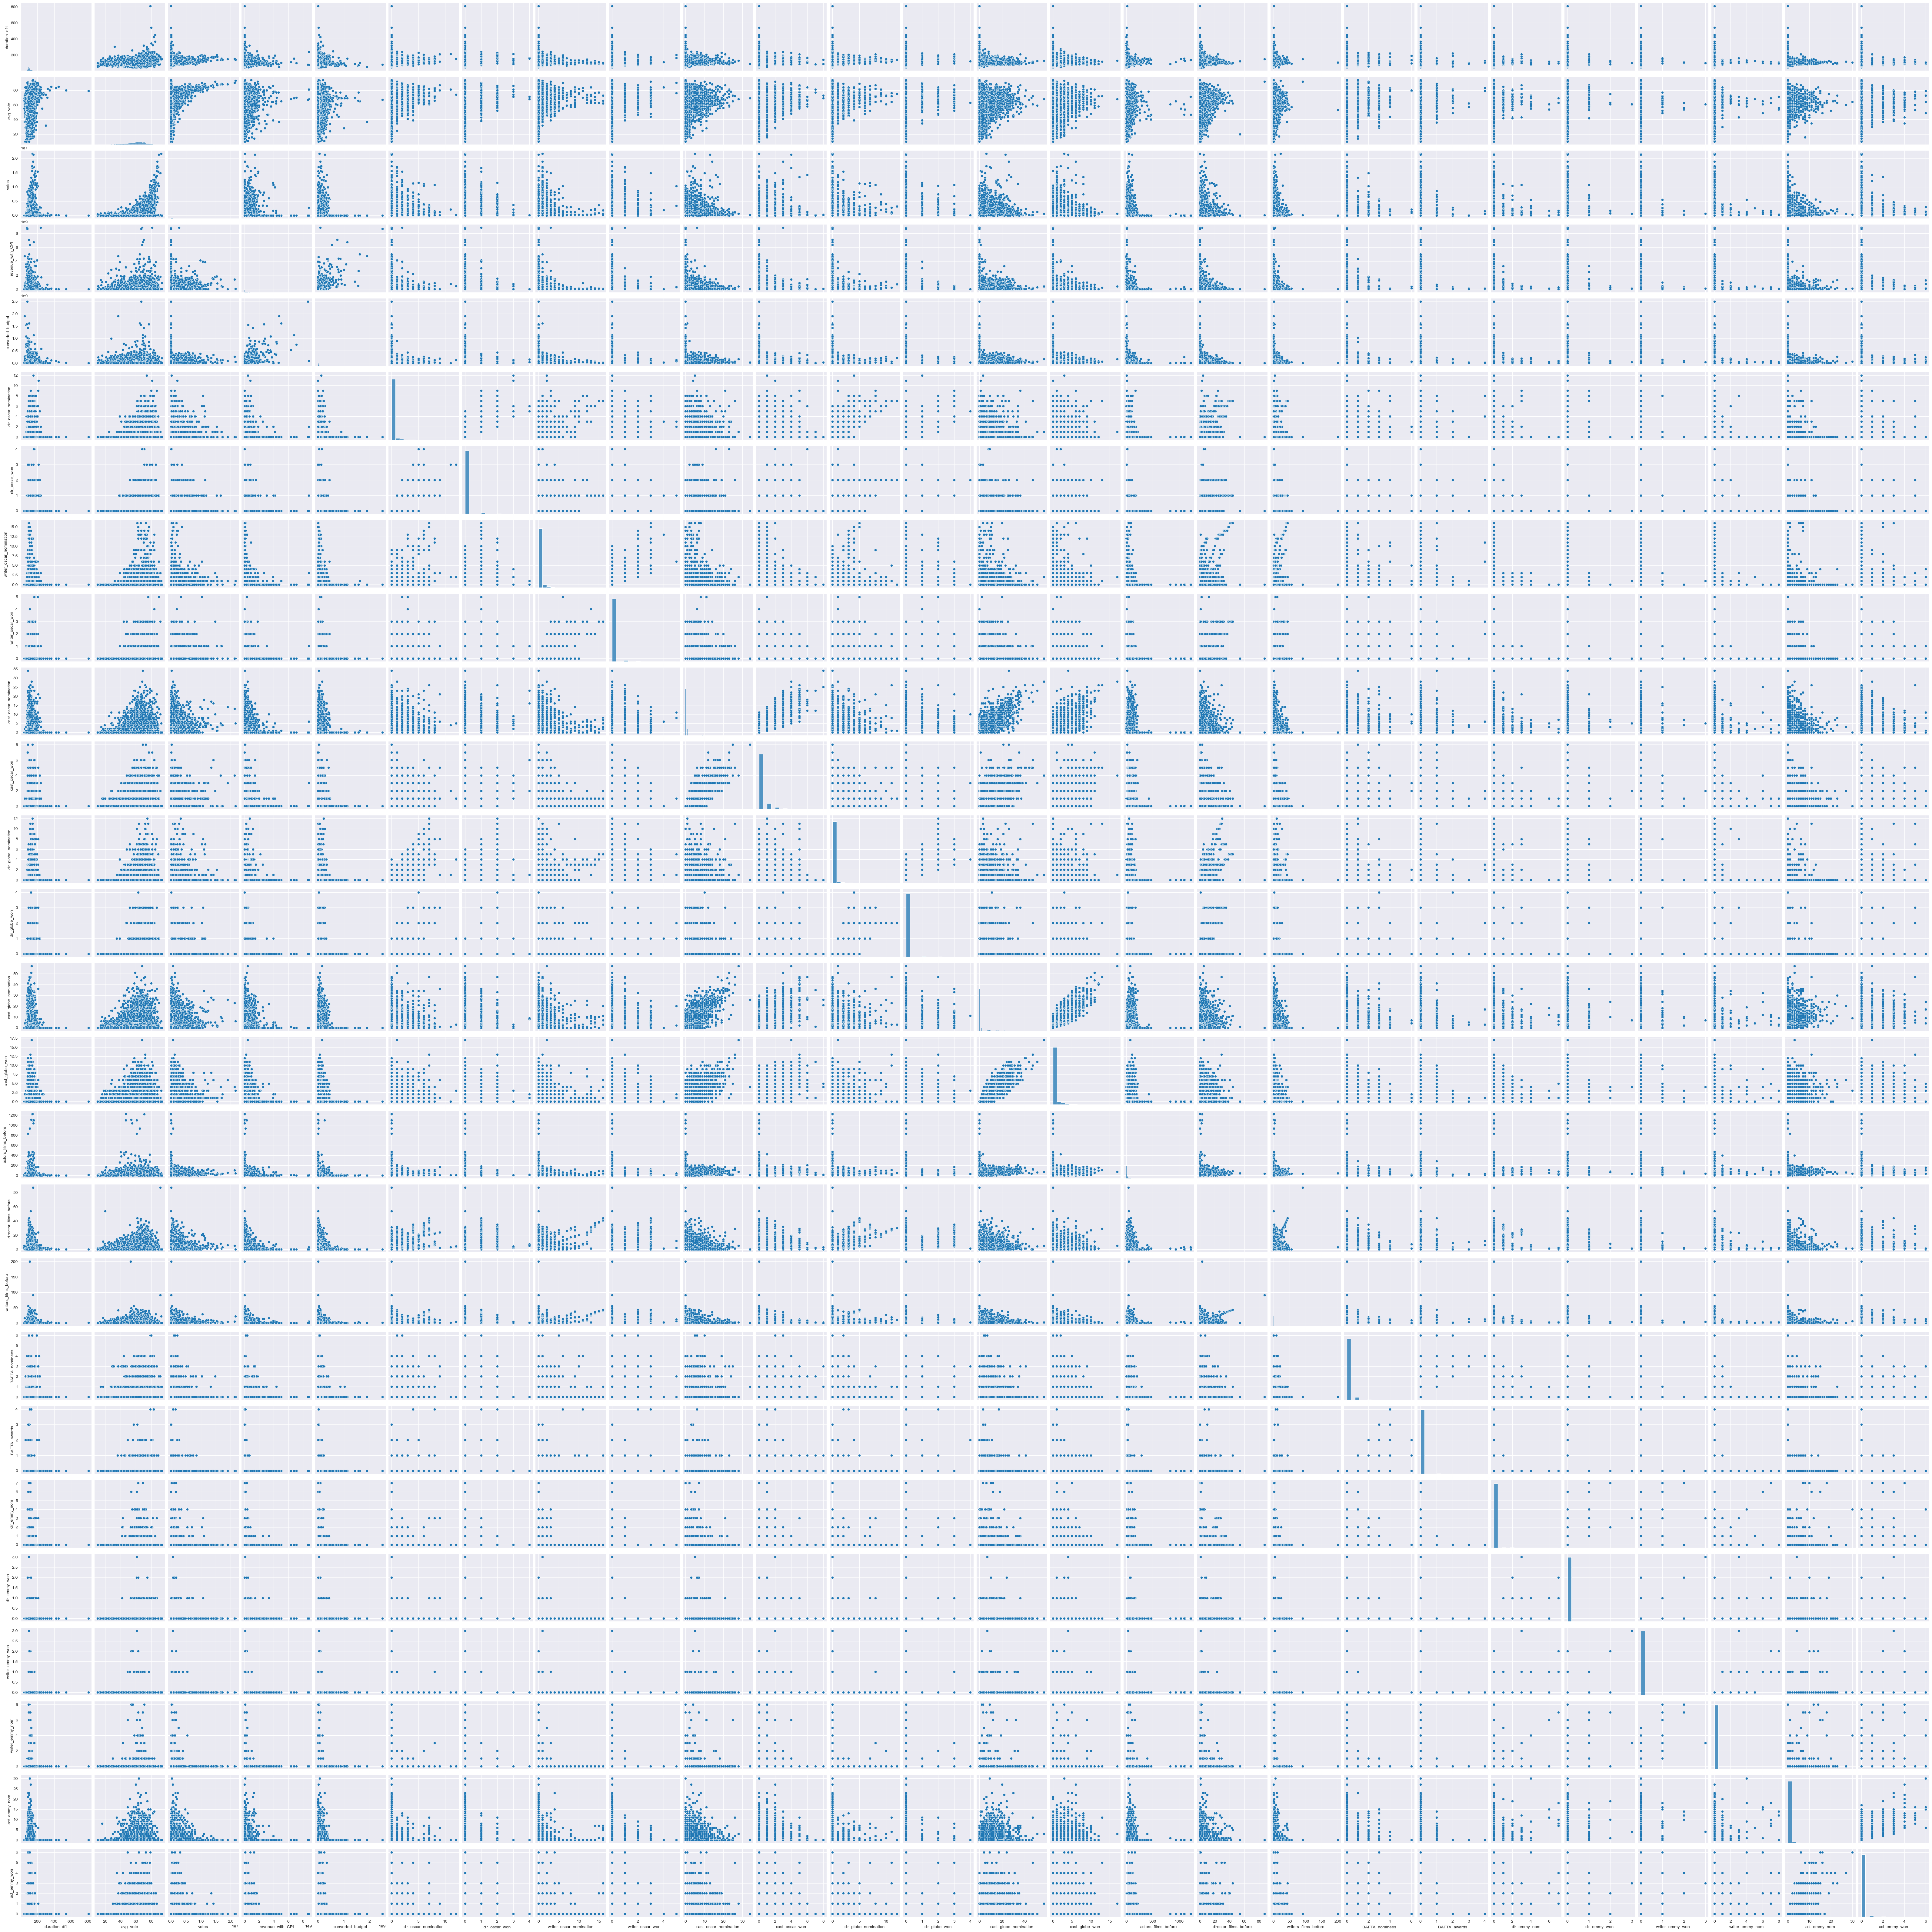

In [96]:

# Scatter Plots for Numerical Columns Pairs
sns.pairplot(df[numerical_columns].dropna())
plt.show()



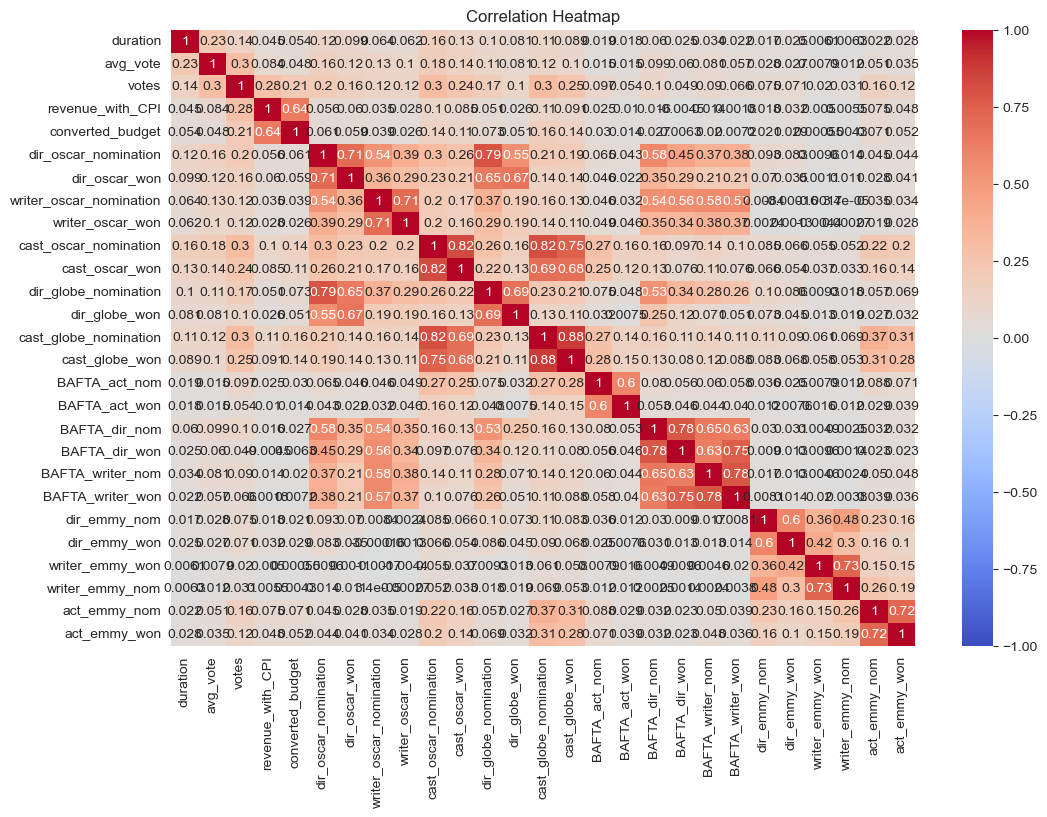

In [116]:

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



# Categorical Features

In [104]:
# Descriptive Statistics for Categorical Columns
print("\nDescriptive Statistics for Categorical Columns:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(categorical_df[col].value_counts().head(10))  # Show top 10 most frequent categories



Descriptive Statistics for Categorical Columns:

Column: genre
genre
Drama                     2412
Comedy                    1557
Comedy, Drama             1012
Drama, Romance             769
Comedy, Drama, Romance     711
Comedy, Romance            666
Action, Crime, Drama       430
Horror                     406
Crime, Drama, Thriller     329
Horror, Thriller           326
Name: count, dtype: int64

Column: country
country
USA        9089
Other      4012
UK         1636
France     1534
India      1065
Germany     765
Canada      626
Italy       608
Japan       552
Spain       550
Name: count, dtype: int64

Column: language
language
English     12691
Other        2969
French       1227
Spanish       862
Hindi         566
German        545
Japanese      528
Italian       500
Russian       443
Turkish       341
Name: count, dtype: int64

Column: production_company_df1
production_company_df1
Other                    17267
Warner                     678
Universal                  623
So

In [117]:

# Mantieni solo il primo elemento in ogni cella delle colonne 'language' e 'country'
df['language'] = df['language'].str.split(', ').str[0]
df['country'] = df['country'].str.split(', ').str[0]

# Conta i valori unici nelle colonne 'language' e 'country'
language_counts = df['language'].value_counts()
country_counts = df['country'].value_counts()

# Mantieni solo i primi 15 valori più comuni e sostituisci gli altri con 'Other'
#top_languages = language_counts.head(15).index
#top_countries = country_counts.head(15).index

#df.loc[~df['language'].isin(top_languages), 'language'] = 'Other'
#df.loc[~df['country'].isin(top_countries), 'country'] = 'Other'



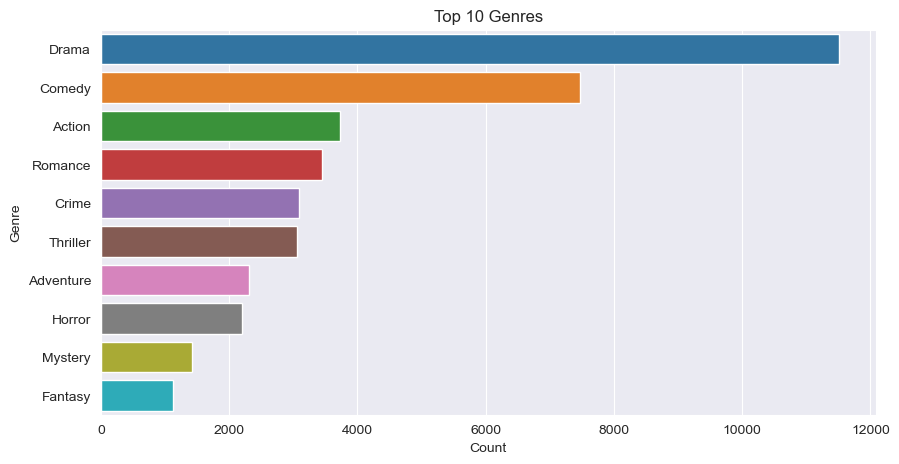

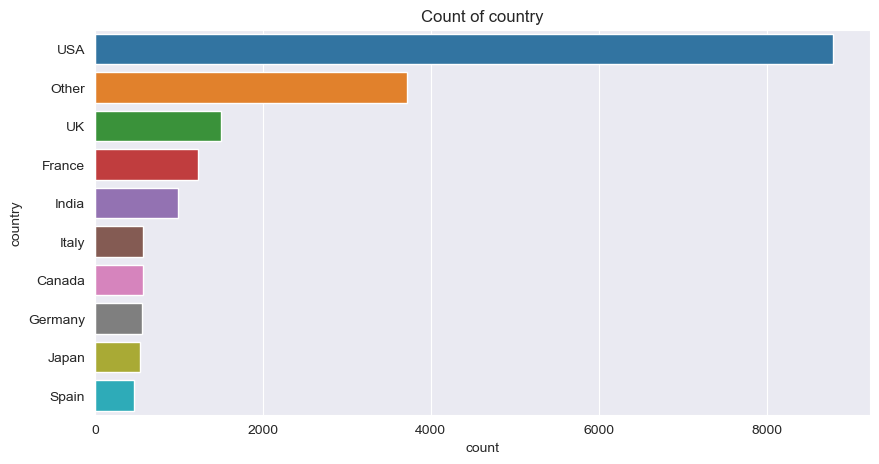

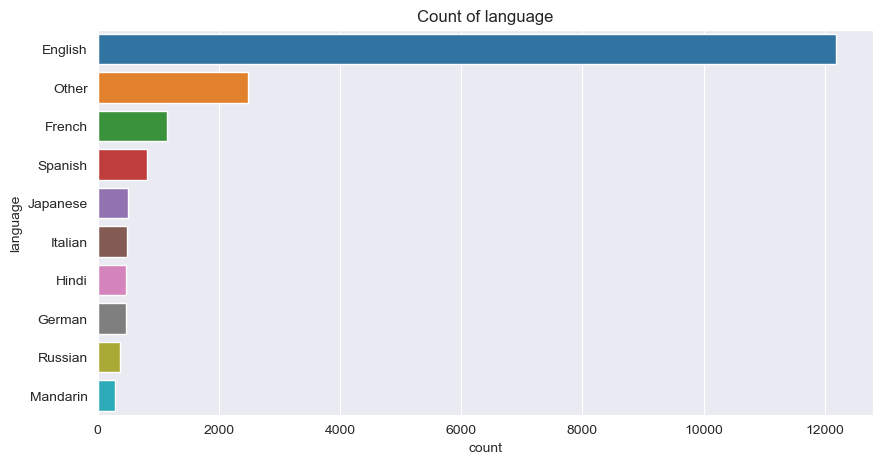

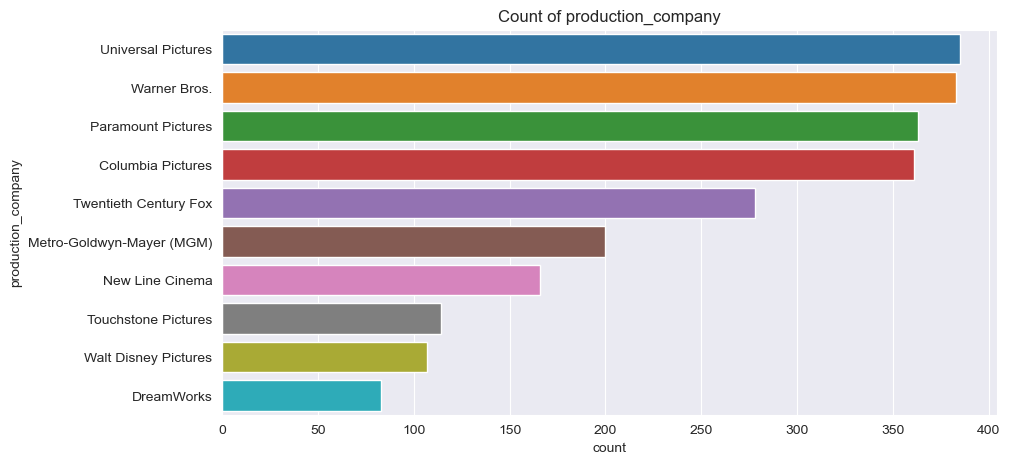

In [121]:
# Split the genre column into individual genres
all_genres = df['genre'].dropna().str.split(', ').sum()
genre_counts = Counter(all_genres)

genre_df = pd.DataFrame(genre_counts.items(), columns=['genre', 'count']).sort_values(by='count', ascending=False)

# Plot the top 10 genres
plt.figure(figsize=(10, 5))
sns.barplot(data=genre_df.head(10), x='count', y='genre')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Plot counts for other categorical columns
for col in categorical_columns:
    if col != 'genre':  
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10])  # Show top 10 categories
        plt.title(f'Count of {col}')
        plt.show()

In [128]:

import pandas as pd
from scipy.stats import chi2_contingency

# Filtra il DataFrame per rimuovere le righe con "lingua" o "country" uguali a "Other"
df_filtered = df[(df['language'] != 'Other') & (df['country'] != 'Other')]

# Lista per memorizzare i risultati del test del chi-quadro
chi2_results = []
categorical_columns_no_genre = [col for col in categorical_columns if col != 'genre']

# Esegui il test del chi-quadro per ogni coppia di colonne categoriche
for col1 in categorical_columns_no_genre:
    for col2 in categorical_columns_no_genre:
        if col1 != col2:  # Evita di confrontare una colonna con se stessa
            # Crea una tabella di contingenza tra le due colonne
            contingency_table = pd.crosstab(df_filtered[col1], df_filtered[col2])
            
            # Esegui il test del chi-quadro
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            
            # Aggiungi i risultati alla lista
            chi2_results.append((col1, col2, chi2, p_value))

# Stampa i risultati del test del chi-quadro
for result in chi2_results:
    print(f"Chi-square test between {result[0]} and {result[1]}:")
    print(f"  Chi-square value: {result[2]}")
    print(f"  p-value: {result[3]}\n")


Chi-square test between country and language:
  Chi-square value: 136209.14478279056
  p-value: 0.0

Chi-square test between country and production_company:
  Chi-square value: 197582.61849734967
  p-value: 0.0

Chi-square test between language and country:
  Chi-square value: 136209.1447827906
  p-value: 0.0

Chi-square test between language and production_company:
  Chi-square value: 185068.5322539457
  p-value: 0.0

Chi-square test between production_company and country:
  Chi-square value: 197582.61849734973
  p-value: 0.0

Chi-square test between production_company and language:
  Chi-square value: 185068.5322539457
  p-value: 0.0


Un modo comune per esaminare la relazione tra una variabile categorica e una variabile numerica è usare l'ANOVA o il test di Kruskal-Wallis, come abbiamo fatto in precedenza. Tuttavia, se vuoi una misura più diretta della correlazione senza usare encoding, puoi usare l'eta squared (η²) per l'ANOVA o l'epsilon squared (ε²) per il test di Kruskal-Wallis.

Eta Squared (η²)
L'eta squared (η²) è una misura di effetto utilizzata per valutare l'importanza della relazione tra una variabile categorica e una variabile numerica. È calcolata come la proporzione della variazione totale attribuibile alla variazione tra i gruppi.

Epsilon Squared (ε²)
L'epsilon squared (ε²) è una misura simile all'eta squared ma viene usata in contesti non parametrici come il test di Kruskal-Wallis.

In [124]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, kruskal

df.dropna(subset=['production_company'], inplace=True)

categorical_columns_no_genre = [col for col in categorical_columns if col != 'genre']

def eta_squared(anova_statistic, df_between, df_within):
    return anova_statistic * (df_between / (df_between + df_within))

def epsilon_squared(kruskal_statistic, n, k):
    return (kruskal_statistic - k + 1) / (n - k)

# Calcola eta squared e epsilon squared per ogni colonna categoriale
results = []

for col in categorical_columns_no_genre:
    groups = [df[df[col] == category]['revenue_with_CPI'] for category in df[col].unique()]
    
    # Rimuovi gruppi vuoti
    groups = [group for group in groups if len(group) > 0]
    
    if len(groups) > 1:
        # ANOVA
        anova_result = f_oneway(*groups)
        df_between = len(groups) - 1
        df_within = len(df) - len(groups)
        eta_sq = eta_squared(anova_result.statistic, df_between, df_within)
        
        # Kruskal-Wallis
        kruskal_result = kruskal(*groups)
        n = len(df)
        k = len(groups)
        epsilon_sq = epsilon_squared(kruskal_result.statistic, n, k)
        
        results.append((col, eta_sq, epsilon_sq))

# Visualizza i risultati
for result in results:
    print(f"Correlation between {result[0]} and revenue_with_CPI:")
    print(f"  Eta Squared (η²): {result[1]}")
    print(f"  Epsilon Squared (ε²): {result[2]}\n")

Correlation between genre and revenue_with_CPI:
  Eta Squared (η²): 0.09533231215539589
  Epsilon Squared (ε²): 0.05435477129853055

Correlation between country and revenue_with_CPI:
  Eta Squared (η²): 0.011133021620307148
  Epsilon Squared (ε²): 0.06490505444863362

Correlation between language and revenue_with_CPI:
  Eta Squared (η²): 0.00780409288905881
  Epsilon Squared (ε²): 0.05202199532530442

Correlation between production_company and revenue_with_CPI:
  Eta Squared (η²): 0.4088274763306663
  Epsilon Squared (ε²): 0.3394104538920748


In [133]:
# Dizionario per memorizzare il numero di outlier per ogni colonna
outlier_counts_iqr = {}

# Ciclo su tutte le colonne numeriche
for col in boxcox_transformed_columns:
    # Seleziona la colonna e rimuovi i valori nulli
    data = df[col].dropna()
    
    # Calcola il primo e il terzo quartile
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # Calcola l'IQR
    iqr = q3 - q1
    
    # Definisci la soglia per individuare gli outlier
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Individua gli outlier utilizzando l'IQR
    outliers_iqr = data[(data < lower_bound) | (data > upper_bound)]
    
    # Conta il numero di outlier e aggiungilo al dizionario
    outlier_counts_iqr[col] = len(outliers_iqr)

# Stampare il numero di outlier per ogni colonna utilizzando l'IQR
for col, count in outlier_counts_iqr.items():
    print(f"Colonna '{col}': {count} outlier")


Colonna 'boxcox_duration': 413 outlier
Colonna 'boxcox_avg_vote': 149 outlier
Colonna 'boxcox_votes': 0 outlier
Colonna 'boxcox_revenue_with_CPI': 6 outlier
Colonna 'boxcox_converted_budget': 4629 outlier
Colonna 'boxcox_dir_oscar_nomination': 1161 outlier
Colonna 'boxcox_dir_oscar_won': 440 outlier
Colonna 'boxcox_writer_oscar_nomination': 1410 outlier
Colonna 'boxcox_writer_oscar_won': 456 outlier
Colonna 'boxcox_cast_oscar_nomination': 0 outlier
Colonna 'boxcox_cast_oscar_won': 2929 outlier
Colonna 'boxcox_dir_globe_nomination': 930 outlier
Colonna 'boxcox_dir_globe_won': 279 outlier
Colonna 'boxcox_cast_globe_nomination': 0 outlier
Colonna 'boxcox_cast_globe_won': 4329 outlier
Colonna 'boxcox_BAFTA_act_nom': 4632 outlier
Colonna 'boxcox_BAFTA_act_won': 1549 outlier
Colonna 'boxcox_BAFTA_dir_nom': 1413 outlier
Colonna 'boxcox_BAFTA_dir_won': 348 outlier
Colonna 'boxcox_BAFTA_writer_nom': 1035 outlier
Colonna 'boxcox_BAFTA_writer_won': 248 outlier
Colonna 'boxcox_dir_emmy_nom': 155 o

ValueError: could not convert string to float: 'Crime, Drama, Thriller'